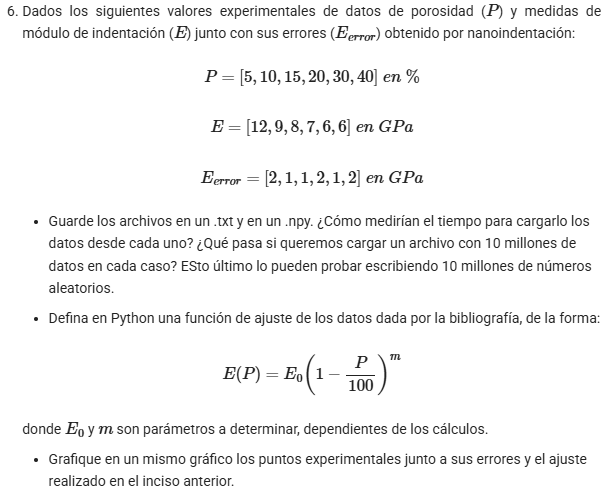

In [29]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import time as ti

In [ ]:
datos = np.array([
    ["P en [%]", 5, 10, 15, 20, 30, 40],
    ["E en [GPa]", 12, 9, 8, 7, 6, 6],
    ["Error en [GPA]", 2, 1, 1, 2, 1, 2]
])

#..................................................................................................

# Para el calculo de tiempo se utiliza el comando time.time 

st1 = ti.time()
np.save('datosProblema6', datos)
ft1 = ti.time()

st2 = ti.time()
np.savetxt('datosProblema6.txt', datos[:, 1:], fmt='%s', delimiter=',')
ft2 = ti.time()

print (ft1-st1)
print (ft2-st2)

0.0022454261779785156
0.0031974315643310547


In [ ]:
datos_c = np.load('datosProblema6.npy')

datos_mod = np.delete(datos_c, 0, axis=1)   # Se eliminan la columna donde estan los nombre de las filas

print(datos_c)
print(datos_mod)

[['P en [%]' '5' '10' '15' '20' '30' '40']
 ['E en [GPa]' '12' '9' '8' '7' '6' '6']
 ['Error en [GPA]' '2' '1' '1' '2' '1' '2']]
[['5' '10' '15' '20' '30' '40']
 ['12' '9' '8' '7' '6' '6']
 ['2' '1' '1' '2' '1' '2']]


In [ ]:
M = np.random.rand(3162,3162)
print(M.shape)

st1 = ti.time()
np.save('datos3162', M)
ft1 = ti.time()

#st2 = ti.time()
#np.savetxt('datos3162.txt', M[:, :], fmt='%s', delimiter=',')
#ft2 = ti.time()

print (ft1-st1)
#print (ft2-st2)

(3162, 3162)
0.1400752067565918
15.758973121643066


b - Termino Independiente: 2.3726020545271362
a - Pendiente: 1.3793355208070832


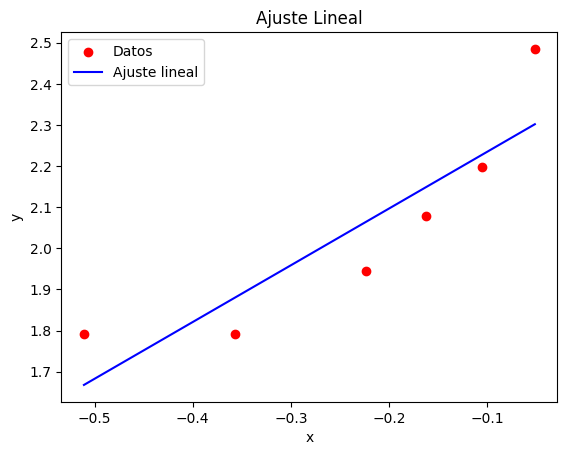

In [71]:
# Se debe linealizar la expresion

E = datos_mod[1,:].astype(float)    # Se debe definir el tipo de dato con el que se va a trabajar
P = datos_mod[0,:].astype(float)
error = datos_mod[2,:].astype(float)

x = np.log(1 - P / 100)
y = np.log(E)

# Ajuste lineal (grado 1)
coeficientes = np.polyfit(x, y, 1)

# Obtener los coeficientes
a = coeficientes[0]  # Coeficiente de la pendiente
b = coeficientes[1]  # Coeficiente del termino independiente

# Mostrar los coeficientes
print(f'b - Termino Independiente: {b}')
print(f'a - Pendiente: {a}')

# Graficar los datos y la recta ajustada
plt.scatter(x, y, color='r', label='Datos')
plt.plot(x, a*x + b, label='Ajuste lineal', color='b')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste Lineal')
plt.show()


Coeficiente m: 1.38
Coeficiente Eo: 10.73


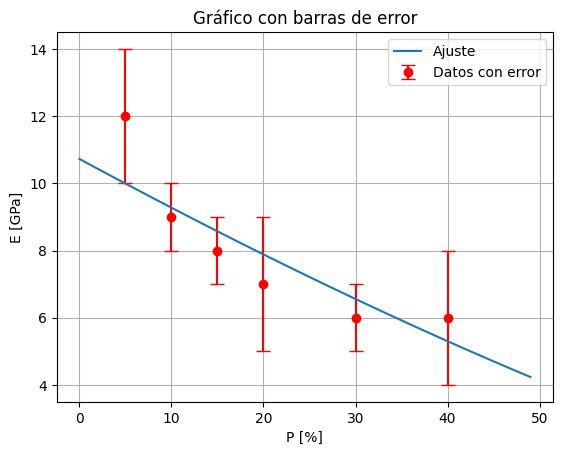

In [85]:
# La funcion de ajuste de los datos segun la bibliografia es: 

m = a               # Pendiente de la recta de ajuste
Eo = np.exp(b)      # Termino independiente

Px = np.arange(0,50,1)

Ey = Eo * (1 - Px/100)**m

print(f'Coeficiente m: {m:.2f}')
print(f'Coeficiente Eo: {Eo:.2f}')

# Graficar con barras de error
plt.errorbar(P, E, yerr=error, fmt='o', capsize=5, capthick=1, color='r', label="Datos con error")
plt.plot(Px,Ey, label = "Ajuste")

# Personalizar el gráfico
plt.ylabel("E [GPa]")
plt.xlabel("P [%]")
plt.title("Gráfico con barras de error")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()
